In [1]:
# Import all the necessary libraries for the notebook
import matplotlib.pyplot as plt
%matplotlib widget

import pandas as pd
import numpy as np

from skn.query import Query

import sys

from skn import utils
from skn.query import Query
from skn.plotting_service import PlottingService
from skn.simple_plotter import SimplePlotter

from skn.CAN.fields.channels import *
from skn.CAN.tags.tags import *

import numpy as np




In [2]:
# Display/Locate logs
Query().all_tags( Car.VEGA, Event.ENDURANCE).print_logs()

log_id:      CAN_2025_05_10_125333
car:         Vega
comment:     Failed. Inboard suspension broke
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    Ramp-up pre endurance attempt - fail
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_24_152529
car:         Vega
comment:     Endurance stint attempt. Stopped at round ~8. Packet-loss issues. Bodyslip and cA
driver:      David
event:       Endurance
location:    Dragvoll
log_name:    Endurance stint attempt - David
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_25_172200
car:         Vega
comment:     Stopped because cell voltage below 3.3
driver:      Fredrik Gravem
event:       Endurance
location:    Dragvoll
log_name:    stint2_endurance_fred
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_31_125907
car:         Vega
comment:     Wet track. cA, 60kW power lim +KERS lim. 17k RPM limit. Guro stint 1, Stian stint 2.
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    Endurance ful

Make a Dict from log_id's - Copy last print into log_text.

In [3]:
import re

log_text = """
log_id:      CAN_2025_05_10_125333
car:         Vega
comment:     Failed. Inboard suspension broke
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    Ramp-up pre endurance attempt - fail
log_type:    TEST_DRIVE

log_id:      CAN_2025_05_10_130000_test
car:         Vega   
comment:     Ramp-up pre endurance attempt. 1st stint. 60kW power limit + KERS limit. 17k RPM limit.
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    Ramp-up pre endurance attempt - Guro
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_24_152529
car:         Vega
comment:     Endurance stint attempt. Stopped at round ~8. Packet-loss issues. Bodyslip and cA
driver:      David
event:       Endurance
location:    Dragvoll
log_name:    Endurance stint attempt - David
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_25_172200
car:         Vega
comment:     Stopped because cell voltage below 3.3
driver:      Fredrik Gravem
event:       Endurance
location:    Dragvoll
log_name:    stint2_endurance_fred
log_type:    TEST_DRIVE


log_id:      CAN_2025_05_31_125907
car:         Vega
comment:     Wet track. cA, 60kW power lim +KERS lim. 17k RPM limit. Guro stint 1, Stian stint 2.
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    Endurance full - Guro/Stian
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_07_231326
car:         Vega
comment:     First sting Guro
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    first_stint
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_07_232636
car:         Vega
comment:     Second stint Stian driver
driver:      Stian Persson Lie
event:       Endurance
location:    Dragvoll
log_name:    Second_stint_endurance
log_type:    COMPETITION_DRIVE


log_id:      CAN_2025_06_14_173642
car:         Vega
comment:     Guro and Stian. Accu voltage was very low in the end. Sunny, 25 deg ambient
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    full_endurance_dragvoll
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_15_165500
car:         Vega
comment:     First stint. Guro. Focus on coasting when driving. 25 deg ambient.
driver:      Guro
event:       Endurance
location:    Dragvoll
log_name:    full_endurance_stint1
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_15_165601
car:         Vega
comment:     Second stint. 24 deg ambient. Pressure reduced to 0.65 bar.
driver:      Stian Persson Lie
event:       Endurance
location:    Dragvoll
log_name:    full_endurance_stint2
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_22_230958
car:         Vega
comment:     UDP dump. Barely drove. Car toggles, continues driving. Cancel. PCU dead
driver:      Guro
event:       Endurance
location:    Lånkebanen
log_name:    Endurance attempt - failure
log_type:    TEST_DRIVE


log_id:      CAN_2025_06_25_035618
car:         Vega
comment:     Endurance at lånke. 24.06
driver:      Guro
event:       Endurance
location:    Lånkebanen
log_name:    Endurance_Stint_1
log_type:    TEST_DRIVE
"""  # (Replace with your full output)

logs = {}
current_log_id = None
current_log = {}

for line in log_text.strip().splitlines():
    line = line.strip()
    if not line:
        # Blank line indicates end of one log block
        if current_log_id:
            logs[current_log_id] = current_log
        current_log_id = None
        current_log = {}
    else:
        if line.startswith("log_id:"):
            current_log_id = line.split(":")[1].strip()
        else:
            key, value = line.split(":", 1)
            current_log[key.strip()] = value.strip()

# Catch the last log (if no trailing blank line)
if current_log_id and current_log_id not in logs:
    logs[current_log_id] = current_log

# --- Result ---
print(logs)


{'CAN_2025_05_10_125333': {'car': 'Vega', 'comment': 'Failed. Inboard suspension broke', 'driver': 'Guro', 'event': 'Endurance', 'location': 'Dragvoll', 'log_name': 'Ramp-up pre endurance attempt - fail', 'log_type': 'TEST_DRIVE'}, 'CAN_2025_05_10_130000_test': {'car': 'Vega', 'comment': 'Ramp-up pre endurance attempt. 1st stint. 60kW power limit + KERS limit. 17k RPM limit.', 'driver': 'Guro', 'event': 'Endurance', 'location': 'Dragvoll', 'log_name': 'Ramp-up pre endurance attempt - Guro', 'log_type': 'TEST_DRIVE'}, 'CAN_2025_05_24_152529': {'car': 'Vega', 'comment': 'Endurance stint attempt. Stopped at round ~8. Packet-loss issues. Bodyslip and cA', 'driver': 'David', 'event': 'Endurance', 'location': 'Dragvoll', 'log_name': 'Endurance stint attempt - David', 'log_type': 'TEST_DRIVE'}, 'CAN_2025_05_25_172200': {'car': 'Vega', 'comment': 'Stopped because cell voltage below 3.3', 'driver': 'Fredrik Gravem', 'event': 'Endurance', 'location': 'Dragvoll', 'log_name': 'stint2_endurance_fre

Imports Logs into Dict

In [4]:
# Validate log IDs and process them
results = {}
invalid_log_ids = []

for log_id in logs.keys():
    if not log_id in Log_id.__members__:
        print(f"Skipping invalid log_id: {log_id}", "Log_name:", logs[log_id].get('log_name', 'N/A'))
        invalid_log_ids = invalid_log_ids if 'invalid_log_ids' in locals() else []
        invalid_log_ids.append(log_id)
        continue
    results[log_id] = Query().all_tags(getattr(Log_id, log_id)).channels(AMS.TSDATA.CURRENT).channels(AMS.TSDATA.VOLTAGE_TOTAL_SUM_OF_CELLS).execute()
    print(f"Processed log_id: {log_id}", "Log_name:", logs[log_id].get('log_name', 'N/A'))
# Remove invalid log IDs from the logs dictionary
if 'invalid_log_ids' in locals():
    for log_id in invalid_log_ids:
        del logs[log_id]
        print(f"Removed invalid log_id: {log_id}")


Processed log_id: CAN_2025_05_10_125333 Log_name: Ramp-up pre endurance attempt - fail
Skipping invalid log_id: CAN_2025_05_10_130000_test Log_name: Ramp-up pre endurance attempt - Guro
Processed log_id: CAN_2025_05_24_152529 Log_name: Endurance stint attempt - David
Processed log_id: CAN_2025_05_25_172200 Log_name: stint2_endurance_fred
Processed log_id: CAN_2025_05_31_125907 Log_name: Endurance full - Guro/Stian
Processed log_id: CAN_2025_06_07_231326 Log_name: first_stint
Processed log_id: CAN_2025_06_07_232636 Log_name: Second_stint_endurance
Processed log_id: CAN_2025_06_14_173642 Log_name: full_endurance_dragvoll
Processed log_id: CAN_2025_06_15_165500 Log_name: full_endurance_stint1
Processed log_id: CAN_2025_06_15_165601 Log_name: full_endurance_stint2
Skipping invalid log_id: CAN_2025_06_22_230958 Log_name: Endurance attempt - failure
Skipping invalid log_id: CAN_2025_06_25_035618 Log_name: Endurance_Stint_1
Removed invalid log_id: CAN_2025_05_10_130000_test
Removed invalid lo

Convert logs to np.arrays

In [5]:
# # Validate results and convert to numpy arrays
# for log_id in logs.keys():
#     if log_id not in results:
#         print(f"No results for log_id: {log_id}")
#         continue
#     globals()[f"run_{log_id}"] = results[log_id].to_numpy_arrays()

Polynomial coefficients

In [10]:
Polynomial_coefficients = np.array([[-3.58658616e-06,  1.19978636e-04, -1.73805572e-03,  1.42567608e-02, -7.26328916e-02,  2.37093879e-01, -4.94001929e-01,  6.36254807e-01, -4.74889466e-01,  1.85907107e-01, -1.16270412e-01,  4.34533432e+00]])

Polynomial_coefficients = np.array([[-7.12056796e-06,  2.37972488e-04, -3.44348644e-03,  2.82070308e-02, -1.43451458e-01,  4.67151227e-01, -9.69992761e-01,  1.24260517e+00, -9.18975348e-01,  3.53732685e-01, -2.27406045e-01,  4.34016442e+00]])

capacity = 6.569257 # Ah
print(Polynomial_coefficients)

[[-7.12056796e-06  2.37972488e-04 -3.44348644e-03  2.82070308e-02
  -1.43451458e-01  4.67151227e-01 -9.69992761e-01  1.24260517e+00
  -9.18975348e-01  3.53732685e-01 -2.27406045e-01  4.34016442e+00]]


Define functions

In [7]:
from scipy.integrate import cumtrapz
from scipy.optimize import root_scalar
import numpy as np

def current_to_amperehour(log_id):
    """
    Convert current and time arrays to an array of cumulative charge values (in Ah) at each time step.
    """
    run = globals()[f"run_{log_id}"]
    current = run['TSData_current']
    time = run['time']

    conversion_factor = 1 / 3600  # Convert seconds to hours
    # Cumulative integral of current over time
    charge = cumtrapz(current, x=time, initial=0) * conversion_factor
    return charge

def start_charge(log_id):
    """
    Get the starting charge for a given log_id using root finding.
    """
    run = globals()[f"run_{log_id}"]
    voltage = run['TSData_voltage_total_sum_of_cells']
    start_voltage = voltage[0]  # Assuming the first voltage value is the start voltage

    def ocv_func(q):
        return np.polyval(Polynomial_coefficients[0]*138, q) - start_voltage

    result = root_scalar(ocv_func, bracket=[0, capacity], method='brentq')
    if result.converged:
        return result.root
    else:
        print("Root finding did not converge.")
        return None

def soc_estimation(log_id):
    """
    Convert charge to voltage using polynomial coefficients.
    """
    run = globals()[f"run_{log_id}"]
    voltage = run['TSData_voltage_total_sum_of_cells']

    start_voltage = voltage[0]  # Assuming the first voltage value is the start voltage

    # Find the starting charge
    def ocv_func(q):
        return np.polyval(Polynomial_coefficients[0]*138, q) - start_voltage

    result = root_scalar(ocv_func, bracket=[0, capacity], method='brentq')
    if result.converged:
        start_charge_val = result.root
    else:
        print("Root finding did not converge.")
        return None

    charge = current_to_amperehour(log_id)

    charge = charge + start_charge_val*2

    ocv = np.polyval(Polynomial_coefficients[0]*138, charge/2)

    return ocv

def overpotential(log_id):
    """
    Calculate the overpotential for a given log_id.
    """
    run = globals()[f"run_{log_id}"]
    voltage = run['TSData_voltage_total_sum_of_cells']

    ocv = soc_estimation(log_id)
    if ocv is None:
        print(f"Could not calculate OCV for log_id: {log_id}")
        return None

    overpotential = ocv - voltage
    return overpotential 

# def effciency(log_id):
#     """
#     Calculate the efficiency for a given log_id.
#     """
#     run = globals()[f"run_{log_id}"]
#     current = run['TSData_current']
#     voltage = run['TSData_voltage_total_sum_of_cells']

#     if len(current) == 0 or len(voltage) == 0:
#         print(f"No data available for log_id: {log_id}")
#         return None

    
    
#     if len(charge) == 0:
#         print(f"No charge data available for log_id: {log_id}")
#         return None

#     energy_out = charge[-1] * 3.7  # Assuming nominal voltage of 3.7V for the battery
#     efficiency = (energy_out / energy_in) * 100 if energy_in != 0 else 0
#     return efficiency

def effciency(log_id):
    """
    Calculate the efficiency for a given log_id.
    """
    soc_estimation = soc_estimation(log_id)
    overpotential = abs(overpotential(log_id))
    efficiency = (soc_estimation - overpotential) / soc_estimation

    
    return efficiency



In [8]:
for log_id in logs.keys():
    if log_id not in results:
        print(f"No results for log_id: {log_id}")
        continue
    globals()[f"run_{log_id}"] = results[log_id].to_numpy_arrays()

NameError: name 'props' is not defined

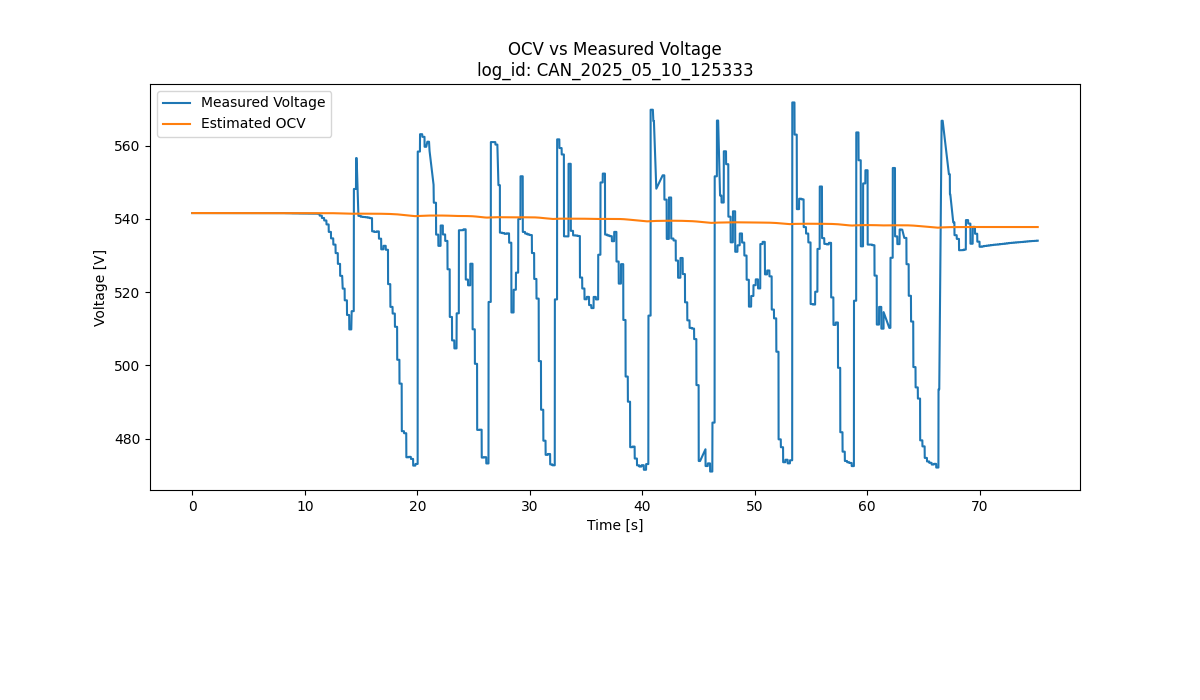

In [9]:

# Plot all logs in separate figures with log info below each plot

for log_id in logs.keys():
    run = globals()[f"run_{log_id}"]
    time = run['time']
    voltage = run['TSData_voltage_total_sum_of_cells']
    # Calculate OCV using your soc_estimation function
    ocv = soc_estimation(log_id)
    if ocv is None:
        continue

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(time, voltage, label='Measured Voltage')
    ax.plot(time, ocv, label='Estimated OCV')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Voltage [V]')
    ax.set_title(f'OCV vs Measured Voltage\nlog_id: {log_id}')
    ax.legend()

    # Prepare log info text
    log_info = (
        f"log_id: {log_id}\n"
        f"car: {logs[log_id]['car']}\n"
        f"comment: {logs[log_id]['comment']}\n"
        f"driver: {logs[log_id]['driver']}\n"
        f"event: {logs[log_id]['event']}\n"
        f"location: {logs[log_id]['location']}\n"
        f"log_name: {logs[log_id]['log_name']}\n"
        f"log_type: {logs[log_id]['log_type']}"
    )

    fig.subplots_adjust(bottom=0.3)
    fig.text(0.5, 0.05, log_info, ha='center', va='bottom', fontsize=10, bbox=props)
    plt.show()

Efficiency

In [ ]:
# Prepare data for heatmap: concatenate all currents and overpotentials
import matplotlib.colors as mcolors

# Collect all currents and overpotentials from each log
all_currents = []
all_overpotentials = []

for log_id in logs.keys():
    run = globals()[f"run_{log_id}"]
    current = run['TSData_current']
    overpot = overpotential(log_id)
    if overpot is not None:
        all_currents.append(current)
        all_overpotentials.append(overpot)

all_currents_concat = np.concatenate(all_currents)
all_overpotentials_concat = np.concatenate(all_overpotentials)

# Create 2D histogram (heatmap) in log scale
plt.figure(figsize=(8, 6))
hist, xedges, yedges, img = plt.hist2d(
    all_currents_concat, all_overpotentials_concat,
    bins=[100, 100],
    norm=mcolors.LogNorm(),
    cmap='viridis'
)

plt.colorbar(label='Counts (log scale)')
plt.xlabel('Current [A]')
plt.ylabel('Overpotential [V]')
plt.title('Heatmap of Overpotential vs Current (All Logs, Log Scale)')
# Fix: Define current_to_voltage as an alias for soc_estimation (used in overpotential)

plt.show()

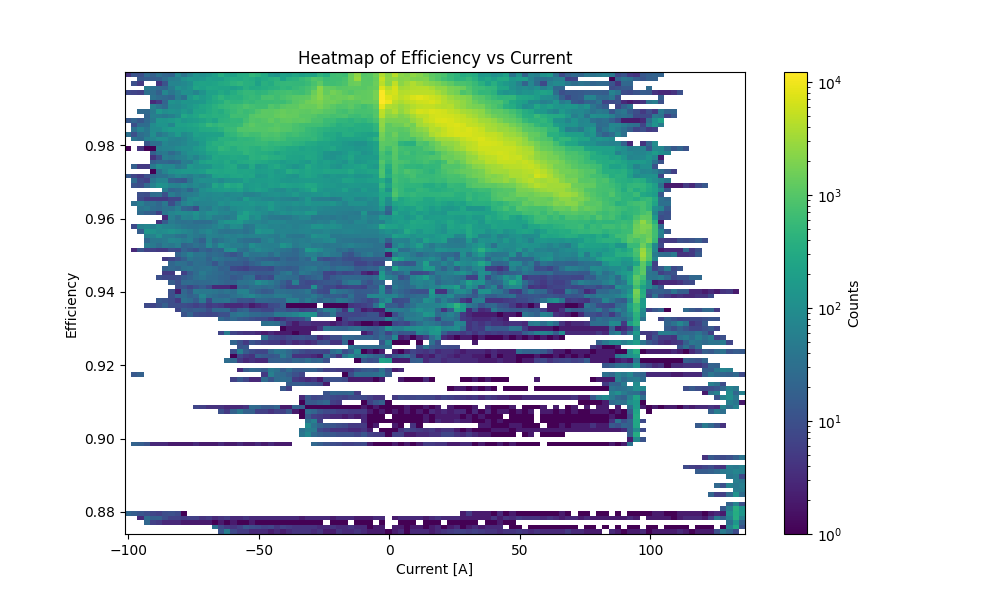

In [ ]:
from matplotlib import colors as mcolors

all_currents = []
all_efficiencies = []

for log_id in logs.keys():
    run = globals()[f"run_{log_id}"]
    current = run['TSData_current']
    efficiency = effciency(log_id)
    if efficiency is not None:
        mask_current = abs(current) > 1
        all_currents.append(current[mask_current])
        all_efficiencies.append(efficiency[mask_current])

all_currents_concat = np.concatenate(all_currents)
all_efficiencies_concat = np.concatenate(all_efficiencies)

plt.figure(figsize=(10, 6))
plt.hist2d(
    all_currents_concat, all_efficiencies_concat,
    bins=[100, 100],
    cmap='viridis',
    norm=mcolors.LogNorm(),
)
plt.colorbar(label='Counts')
plt.xlabel('Current [A]')
plt.ylabel('Efficiency')
plt.title('Heatmap of Efficiency vs Current')
plt.show()


Power loss vs current